Matplotlib is building the font cache; this may take a moment.


<Figure size 1200x600 with 0 Axes>

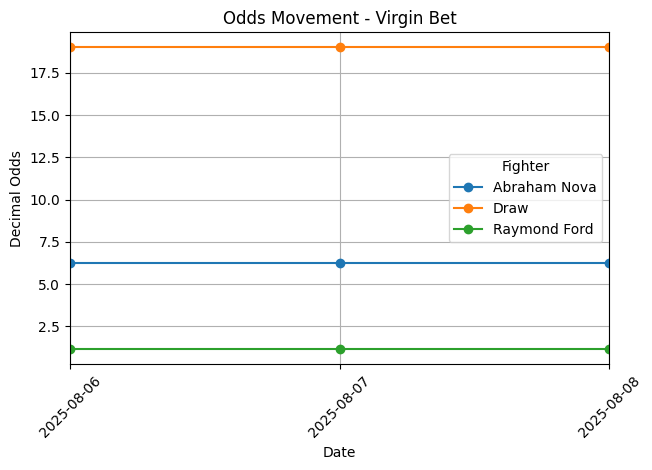

In [1]:
from datetime import datetime
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# Connect to DB
conn = sqlite3.connect("boxing_odds_staging.db")

# Set bookmaker and event
bookmaker = "Virgin Bet"
event_id = "33ebcf4b4c433b51f81ed5375f9fe2e7"

# Query data
query = """
SELECT fighter, observed_at, decimal_odds
FROM odds_history
WHERE bookmaker = ?
  AND event_id = ?
ORDER BY observed_at
"""
df = pd.read_sql(query, conn, params=(bookmaker, event_id))
conn.close()

# Convert to datetime
df["observed_at"] = pd.to_datetime(df["observed_at"])

# Truncate datetime to just date (optional for grouping)
df["date_only"] = df["observed_at"].dt.date

# Pivot for plotting
pivot_df = df.pivot(index="date_only", columns="fighter", values="decimal_odds")

# Plot
plt.figure(figsize=(12, 6))
pivot_df.plot(marker="o")

# Format x-axis to show only date
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Tick every day

plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Decimal Odds")
plt.title(f"Odds Movement - {bookmaker}")
plt.grid(True)
plt.legend(title="Fighter")
plt.tight_layout()

# Optional: cap x-axis at today
plt.xlim(pivot_df.index.min(), pd.to_datetime("today").date())

plt.show()